# Analisi delle varianti di Rprop per la classificazione del dataset MNIST
Il presente quaderno Jupyter fornisce un ambiente interattivo per l'esplorazione e l'addestramento di reti neurali per il riconoscimento delle cifre del dataset MNIST. Con questo quaderno, gli utenti possono:


### Sperimentare con diverse configurazioni di Reti Neurali
Il quaderno offre la flessibilità di sperimentare con una vasta gamma di configurazioni di reti neurali. Gli utenti possono definire il numero di strati nascosti, il numero di neuroni per strato e le funzioni di attivazione desiderate per costruire la loro rete neurale.


### Personalizzare i parametri di addestramento
Gli utenti possono personalizzare i parametri di addestramento come il numero di epoche, il tasso di apprendimento e la suddivisione del set di addestramento. Inoltre, possono specificare il numero di run, ovvero quante volte desiderano ripetere l'addestramento per una determinata configurazione di rete e algoritmo di ottimizzazione.


### Testare diversi algoritmi di ottimizzazione Rprop
Il quaderno include implementazioni di diversi algoritmi di ottimizzazione, tra cui varianti di Rprop come Rprop-, Rprop+, iRprop-, e iRprop+. Gli utenti possono confrontare le prestazioni delle reti neurali addestrate con questi diversi algoritmi di ottimizzazione.


### Valutare le Prestazioni delle Reti Neurali
Il quaderno fornisce un'analisi dettagliata delle prestazioni delle reti neurali addestrate, inclusi l'errore sui set di addestramento e di validazione, l'accuratezza sui set di addestramento, di validazione e di test e il tempo di esecuzione. Inoltre, vengono calcolate la media e la varianza delle metriche di prestazione su più run, consentendo agli utenti di valutare la stabilità e la consistenza delle configurazioni di rete e algoritmi di ottimizzazione.


## Contenuti
1. Estrazione e preparazione del dataset MNIST
2. Creazione delle reti neurali originarie
3. Addestramento delle reti neurali con diverse varianti di Rprop
4. Valutazione delle prestazioni attraverso grafici
5. Test delle reti addestrate su immagini del test set


N.B: la variabile *number_of_runs* deve essere maggiore di 0.


In [1]:
from uninaannpy import neural_network as nn
from uninaannpy import error_functions as ef
from uninaannpy import activation_functions as af
from uninaannpy import datasets as ds

import numpy as np
import pandas as pd

# Legge csv con pandas
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

# Ottiene array per il training e il test
train_array = np.array(train_data)
test_array = np.array(test_data)

# Estrapola il numero di righe e di colonne di train e test
train_rows, train_cols = train_array.shape 
test_rows, test_cols = test_array.shape  

# Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  
#Calcola percentuale dati per il validation set
validation_percentage = 0.20
val_index = int(np.ceil(train_rows * validation_percentage))

# Distribuzione training, validation e test set
train_X, train_Y = ds.get_mnist_training(train_array, val_index)
validation_X, validation_Y = ds.get_mnist_validation(train_array, val_index)
test_X, test_Y = ds.get_mnist_test(test_array)

In [2]:
## Creazione rete neurale

# Assegna funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [af.leaky_relu]

# Assegna numero di neuroni per ogni strato
hidden_layers = [128]
#Assegna della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = af.identity
error_function = ef.cross_entropy_softmax

# Estrae dimensione input e target
input_layer_size = train_X.shape[0]
output_layer_size = train_Y.shape[0]

epochs = 35
learning_rate = 0.00001
number_of_runs = 10 # Deve essere maggiore di 0!

nets = []

for i in range(number_of_runs):
    hidden_activation_functions = [hidden_activation_functions[0]]
    net = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)
    nets.append(net)

In [3]:
from uninaannpy.neural_network import RpropType

# Inizializza una lista vuota per memorizzare i risultati
std_metrics_list = []
std_trained_nets = []

for i in range(number_of_runs):
    std_training_net = nets[i].duplicate_network()
    
    print('\n\n\nRun numero', i + 1, '\n')
    # Batch training Rprop standard
    std_metrics = std_training_net.train_neural_network(train_X, train_Y, validation_X, validation_Y, epochs=epochs, learning_rate=learning_rate, rprop_type=RpropType.STANDARD)
    std_trained_nets.append(std_training_net)
    std_metrics_list.append(std_metrics)




Run numero 1 


Epoca: 0/35   Rprop utilizzata: RpropType.STANDARD
    Training Accuracy: 0.12742,       Training Loss: 113677.38591;
    Validation Accuracy: 0.12809,     Validation Loss: 28418.13984


Epoca: 1/35   Rprop utilizzata: RpropType.STANDARD
    Training Accuracy: 0.26528,       Training Loss: 104374.13123;
    Validation Accuracy: 0.26261,     Validation Loss: 26101.71842


Epoca: 2/35   Rprop utilizzata: RpropType.STANDARD
    Training Accuracy: 0.36936,       Training Loss: 177369.95179;
    Validation Accuracy: 0.37345,     Validation Loss: 44120.29264


Epoca: 3/35   Rprop utilizzata: RpropType.STANDARD
    Training Accuracy: 0.43061,       Training Loss: 301567.02485;
    Validation Accuracy: 0.43512,     Validation Loss: 75780.20631


Epoca: 4/35   Rprop utilizzata: RpropType.STANDARD
    Training Accuracy: 0.25259,       Training Loss: 505926.12033;
    Validation Accuracy: 0.2511,     Validation Loss: 126155.9834


Epoca: 5/35   Rprop utilizzata: RpropType.STAND

In [5]:
import numpy as np

std_metrics_mean, std_metrics_variance, std_last_metrics_mean, std_last_metrics_variance = nn.metrics_mean_variance(std_metrics_list, epochs, number_of_runs)

Train Error:
Media: 8701.218
Varianza: 239.65224

Validation Error:
Media: 3039.826
Varianza: 21.08256

Train Accuracy:
Media: 0.94652
Varianza: 8e-05

Validation Accuracy:
Media: 0.93466
Varianza: 5e-05

Time:
Media: 15.80422
Varianza: 2.42504



In [6]:
# Stampa accuracy per training e test set
std_test_accuracies = []
std_test_accuracy_mean, std_test_accuracy_variance = 0, 0

for run in range(number_of_runs):
    std_test_accuracies.append(std_trained_nets[run].print_accuracies(f'\nTest Rprop- Run {run + 1}', test_X, test_Y, train_X, train_Y))
    
# Calcola la media
std_test_accuracy_mean = np.mean(std_test_accuracies)
# Calcola la varianza
std_test_accuracy_variance = np.var(std_test_accuracies)
# Calcola la varianza normalizzata rispetto alla media
std_test_accuracy_variance = std_test_accuracy_variance / std_test_accuracy_mean


Test Rprop- Run 1
Test accuracy: 0.93939
Train accuracy: 0.95189

Test Rprop- Run 2
Test accuracy: 0.93119
Train accuracy: 0.93812

Test Rprop- Run 3
Test accuracy: 0.94519
Train accuracy: 0.95767

Test Rprop- Run 4
Test accuracy: 0.92619
Train accuracy: 0.93483

Test Rprop- Run 5
Test accuracy: 0.93619
Train accuracy: 0.9501


In [7]:
# Costruzione della stringa per il file di output
csv_string_std = '0,'+ (':'.join(map(str, hidden_layers))) + ','
csv_string_std += str(number_of_runs) + ',' + ','.join(map(str, std_last_metrics_mean)) + ',' + ','.join(map(str, std_last_metrics_variance)) + f',{round(std_test_accuracy_mean, 5)},{round(std_test_accuracy_variance, 5)}\n'

In [8]:
from uninaannpy.neural_network import RpropType

# Inizializzo una lista vuota per memorizzare i risultati
plus_metrics_list = []
plus_trained_nets = []

for i in range(number_of_runs):
    plus_training_net = nets[i].duplicate_network()
    
    print('\n\n\nRun numero', i + 1, '\n')
    # Batch training Rprop con weight-backtracking
    plus_metrics = plus_training_net.train_neural_network(train_X, train_Y, validation_X, validation_Y, epochs=epochs, learning_rate=learning_rate, rprop_type=RpropType.RPROP_PLUS)
    plus_trained_nets.append(plus_training_net)
    plus_metrics_list.append(plus_metrics)




Run numero 1 


Epoca: 0/35   Rprop utilizzata: RpropType.RPROP_PLUS
    Training Accuracy: 0.12742,       Training Loss: 113677.38591;
    Validation Accuracy: 0.12809,     Validation Loss: 28418.13984


Epoca: 1/35   Rprop utilizzata: RpropType.RPROP_PLUS
    Training Accuracy: 0.26528,       Training Loss: 104374.13123;
    Validation Accuracy: 0.26261,     Validation Loss: 26101.71842


Epoca: 2/35   Rprop utilizzata: RpropType.RPROP_PLUS
    Training Accuracy: 0.31546,       Training Loss: 180755.15775;
    Validation Accuracy: 0.31794,     Validation Loss: 45054.27425


Epoca: 3/35   Rprop utilizzata: RpropType.RPROP_PLUS
    Training Accuracy: 0.22115,       Training Loss: 538370.13021;
    Validation Accuracy: 0.2266,     Validation Loss: 134682.41156


Epoca: 4/35   Rprop utilizzata: RpropType.RPROP_PLUS
    Training Accuracy: 0.28546,       Training Loss: 397869.84061;
    Validation Accuracy: 0.28902,     Validation Loss: 99058.24306


Epoca: 5/35   Rprop utilizzata: Rpro

In [9]:
import numpy as np

plus_metrics_mean, plus_metrics_variance, plus_last_metrics_mean, plus_last_metrics_variance = nn.metrics_mean_variance(plus_metrics_list, epochs, number_of_runs)

Train Error:
Media: 9816.95486
Varianza: 77.77029

Validation Error:
Media: 3169.65832
Varianza: 14.77264

Train Accuracy:
Media: 0.93999
Varianza: 3e-05

Validation Accuracy:
Media: 0.93056
Varianza: 2e-05

Time:
Media: 16.9811
Varianza: 29.93971



In [10]:
# Stampa accuracy per training e test set
plus_test_accuracies = []
plus_test_accuracy_mean, plus_test_accuracy_variance = 0, 0

for run in range(number_of_runs):
    plus_test_accuracies.append(plus_trained_nets[run].print_accuracies(f'\nTest Rprop+ Run {run + 1}', test_X, test_Y, train_X, train_Y))
    
# Calcola la media
plus_test_accuracy_mean = np.mean(plus_test_accuracies)
# Calcola la varianza
plus_test_accuracy_variance = np.var(plus_test_accuracies)
# Calcola la varianza normalizzata rispetto alla media
plus_test_accuracy_variance = plus_test_accuracy_variance / plus_test_accuracy_mean


Test Rprop+ Run 1
Test accuracy: 0.93289
Train accuracy: 0.94089

Test Rprop+ Run 2
Test accuracy: 0.92079
Train accuracy: 0.93517

Test Rprop+ Run 3
Test accuracy: 0.94029
Train accuracy: 0.9491

Test Rprop+ Run 4
Test accuracy: 0.93189
Train accuracy: 0.93817

Test Rprop+ Run 5
Test accuracy: 0.92869
Train accuracy: 0.93664


In [11]:
# Costruzione della stringa per il file di output
csv_string_plus = '1,'+ (':'.join(map(str, hidden_layers))) + ','
csv_string_plus += str(number_of_runs) + ',' + ','.join(map(str, plus_last_metrics_mean)) + ',' + ','.join(map(str, plus_last_metrics_variance)) + f',{round(plus_test_accuracy_mean, 5)},{round(plus_test_accuracy_variance, 5)}\n'

In [12]:
from uninaannpy.neural_network import RpropType

# Inizializza una lista vuota per memorizzare i risultati
istd_metrics_list = []
istd_trained_nets = []

for i in range(number_of_runs):
    istd_training_net = nets[i].duplicate_network()
    
    print('\n\n\nRun numero', i + 1, '\n')
    # Batch training improved Rprop
    istd_metrics = istd_training_net.train_neural_network(train_X, train_Y, validation_X, validation_Y, epochs=epochs, learning_rate=learning_rate, rprop_type=RpropType.IRPROP)
    istd_trained_nets.append(istd_training_net)
    istd_metrics_list.append(istd_metrics)




Run numero 1 


Epoca: 0/35   Rprop utilizzata: RpropType.IRPROP
    Training Accuracy: 0.12742,       Training Loss: 113677.38591;
    Validation Accuracy: 0.12809,     Validation Loss: 28418.13984


Epoca: 1/35   Rprop utilizzata: RpropType.IRPROP
    Training Accuracy: 0.26528,       Training Loss: 104374.13123;
    Validation Accuracy: 0.26261,     Validation Loss: 26101.71842


Epoca: 2/35   Rprop utilizzata: RpropType.IRPROP
    Training Accuracy: 0.36936,       Training Loss: 177369.95179;
    Validation Accuracy: 0.37345,     Validation Loss: 44120.29264


Epoca: 3/35   Rprop utilizzata: RpropType.IRPROP
    Training Accuracy: 0.43953,       Training Loss: 297223.13792;
    Validation Accuracy: 0.44187,     Validation Loss: 74780.3386


Epoca: 4/35   Rprop utilizzata: RpropType.IRPROP
    Training Accuracy: 0.27194,       Training Loss: 476587.74254;
    Validation Accuracy: 0.27152,     Validation Loss: 118476.82979


Epoca: 5/35   Rprop utilizzata: RpropType.IRPROP
    Tra

In [13]:
import numpy as np

istd_metrics_mean, istd_metrics_variance, istd_last_metrics_mean, istd_last_metrics_variance = nn.metrics_mean_variance(istd_metrics_list, epochs, number_of_runs)

Train Error:
Media: 8943.58347
Varianza: 165.33895

Validation Error:
Media: 3198.6367
Varianza: 25.75557

Train Accuracy:
Media: 0.94527
Varianza: 6e-05

Validation Accuracy:
Media: 0.93209
Varianza: 4e-05

Time:
Media: 14.80849
Varianza: 1.30461



In [14]:
# Stampa accuracy per training e test set
istd_test_accuracies = []
istd_test_accuracy_mean, istd_test_accuracy_variance = 0, 0

for run in range(number_of_runs):
    istd_test_accuracies.append(istd_trained_nets[run].print_accuracies(f'\nTest iRprop- Run {run + 1}', test_X, test_Y, train_X, train_Y))
    
# Calcola la media
istd_test_accuracy_mean = np.mean(istd_test_accuracies)
# Calcola la varianza
istd_test_accuracy_variance = np.var(istd_test_accuracies)
# Calcola la varianza normalizzata rispetto alla media
istd_test_accuracy_variance = istd_test_accuracy_variance / istd_test_accuracy_mean


Test iRprop- Run 1
Test accuracy: 0.94449
Train accuracy: 0.95444

Test iRprop- Run 2
Test accuracy: 0.92599
Train accuracy: 0.93719

Test iRprop- Run 3
Test accuracy: 0.93629
Train accuracy: 0.94852

Test iRprop- Run 4
Test accuracy: 0.92749
Train accuracy: 0.93625

Test iRprop- Run 5
Test accuracy: 0.93279
Train accuracy: 0.94814


In [15]:
# Costruzione della stringa per il file di output
csv_string_istd = '2,'+ (':'.join(map(str, hidden_layers))) + ','
csv_string_istd += str(number_of_runs) + ',' + ','.join(map(str, istd_last_metrics_mean)) + ',' + ','.join(map(str, istd_last_metrics_variance)) + f',{round(istd_test_accuracy_mean, 5)},{round(istd_test_accuracy_variance, 5)}\n'

In [16]:
from uninaannpy.neural_network import RpropType

# Inizializza una lista vuota per memorizzare i risultati
iplus_metrics_list = []
iplus_nets = []
iplus_trained_nets = []

for i in range(number_of_runs):
    iplus_training_net = nets[i].duplicate_network()
    
    print('\n\n\nRun numero', i + 1, '\n')
    # Batch training improved Rprop con weight-backtracking
    iplus_metrics = iplus_training_net.train_neural_network(train_X, train_Y, validation_X, validation_Y, epochs=epochs, learning_rate=learning_rate, rprop_type=RpropType.IRPROP_PLUS)
    iplus_metrics_list.append(iplus_metrics)
    iplus_trained_nets.append(iplus_training_net)
    iplus_metrics_list.append(iplus_metrics)




Run numero 1 


Epoca: 0/35   Rprop utilizzata: RpropType.IRPROP_PLUS
    Training Accuracy: 0.12742,       Training Loss: 113677.38591;
    Validation Accuracy: 0.12809,     Validation Loss: 28418.13984


Epoca: 1/35   Rprop utilizzata: RpropType.IRPROP_PLUS
    Training Accuracy: 0.26528,       Training Loss: 104374.13123;
    Validation Accuracy: 0.26261,     Validation Loss: 26101.71842


Epoca: 2/35   Rprop utilizzata: RpropType.IRPROP_PLUS
    Training Accuracy: 0.31546,       Training Loss: 180755.15775;
    Validation Accuracy: 0.31794,     Validation Loss: 45054.27425


Epoca: 3/35   Rprop utilizzata: RpropType.IRPROP_PLUS
    Training Accuracy: 0.22115,       Training Loss: 538370.13021;
    Validation Accuracy: 0.2266,     Validation Loss: 134682.41156


Epoca: 4/35   Rprop utilizzata: RpropType.IRPROP_PLUS
    Training Accuracy: 0.28546,       Training Loss: 397869.84061;
    Validation Accuracy: 0.28902,     Validation Loss: 99058.24306


Epoca: 5/35   Rprop utilizzata:

In [17]:
import numpy as np

iplus_metrics_mean, iplus_metrics_variance, iplus_last_metrics_mean, iplus_last_metrics_variance = nn.metrics_mean_variance(iplus_metrics_list, epochs, number_of_runs)

Train Error:
Media: 8708.0305
Varianza: 315.84219

Validation Error:
Media: 3100.6457
Varianza: 60.72222

Train Accuracy:
Media: 0.94832
Varianza: 8e-05

Validation Accuracy:
Media: 0.93381
Varianza: 9e-05

Time:
Media: 11.91353
Varianza: 0.52277



In [18]:
# Stampa accuracy per training e test set
iplus_test_accuracies = []
iplus_test_accuracy_mean, iplus_test_accuracy_variance = 0, 0

for run in range(number_of_runs):
    iplus_test_accuracies.append(plus_trained_nets[run].print_accuracies(f'\nTest iRprop+ Run {run + 1}', test_X, test_Y, train_X, train_Y))
    
# Calcola la media
iplus_test_accuracy_mean = np.mean(iplus_test_accuracies)
# Calcola la varianza
iplus_test_accuracy_variance = np.var(iplus_test_accuracies)
# Calcola la varianza normalizzata rispetto alla media
iplus_test_accuracy_variance = iplus_test_accuracy_variance / iplus_test_accuracy_mean


Test iRprop+ Run 1
Test accuracy: 0.93289
Train accuracy: 0.94089

Test iRprop+ Run 2
Test accuracy: 0.92079
Train accuracy: 0.93517

Test iRprop+ Run 3
Test accuracy: 0.94029
Train accuracy: 0.9491

Test iRprop+ Run 4
Test accuracy: 0.93189
Train accuracy: 0.93817

Test iRprop+ Run 5
Test accuracy: 0.92869
Train accuracy: 0.93664


In [19]:
# Costruzione della stringa per il file di output
csv_string_iplus = '3,'+ (':'.join(map(str, hidden_layers))) + ','
csv_string_iplus += str(number_of_runs) + ',' + ','.join(map(str, iplus_last_metrics_mean)) + ',' + ','.join(map(str, iplus_last_metrics_variance)) + f',{round(iplus_test_accuracy_mean, 5)},{round(iplus_test_accuracy_variance, 5)}\n'

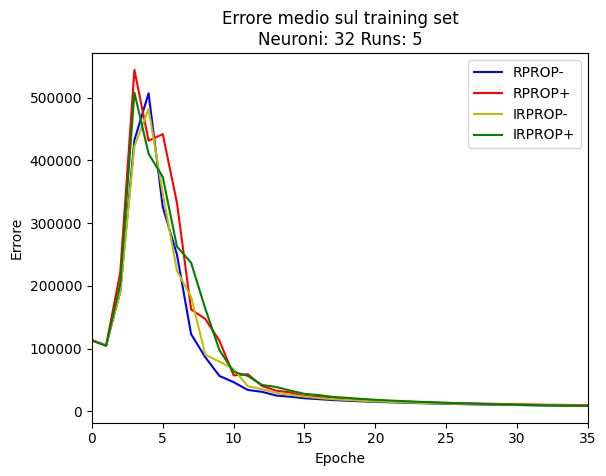

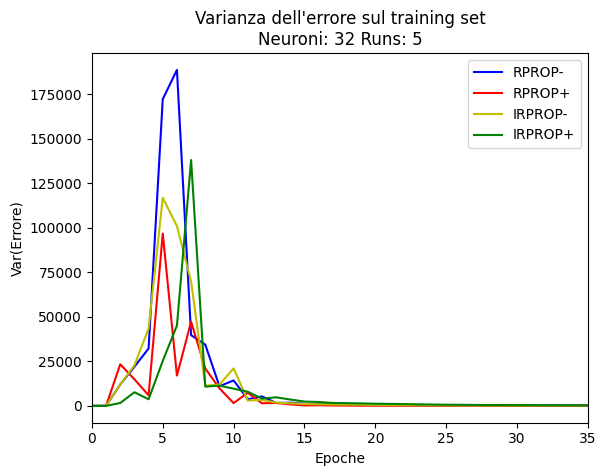

In [20]:
from matplotlib import pyplot as plt

# Stampo grafico dell'errore medio del train set
plt.figure()
plt.plot(std_metrics_mean[0], 'b', label='RPROP-')
plt.plot(plus_metrics_mean[0], 'r', label='RPROP+')
plt.plot(istd_metrics_mean[0], 'y', label='IRPROP-')
plt.plot(iplus_metrics_mean[0], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.title(f'Errore medio sul training set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salvo il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_train_err_mean_{number_of_runs}runs.png')

plt.show()
plt.close()


# Stampo grafico della varianza dell'errore del train set
plt.figure()
plt.plot(std_metrics_variance[0], 'b', label='RPROP-')
plt.plot(plus_metrics_variance[0], 'r', label='RPROP+')
plt.plot(istd_metrics_variance[0], 'y', label='IRPROP-')
plt.plot(iplus_metrics_variance[0], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Var(Errore)')
plt.title(f'Varianza dell\'errore sul training set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salvo il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_train_err_var_{number_of_runs}runs.png')

plt.show()

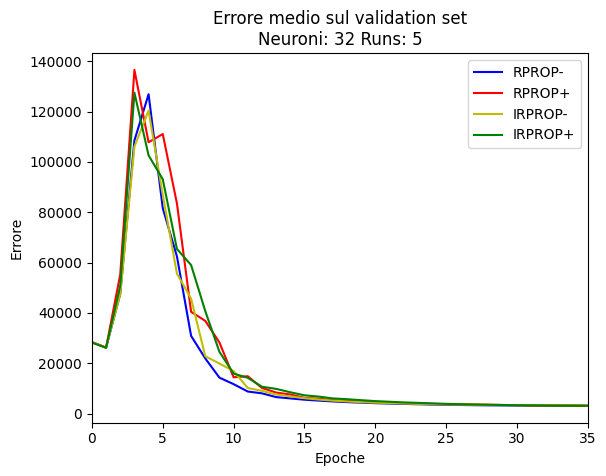

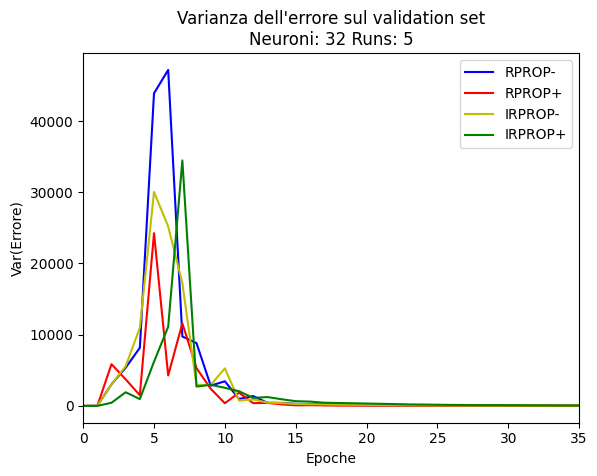

In [21]:
from matplotlib import pyplot as plt

# Stampa grafico dell'errore medio del validation set
plt.figure()
plt.plot(std_metrics_mean[1], 'b', label='RPROP-')
plt.plot(plus_metrics_mean[1], 'r', label='RPROP+')
plt.plot(istd_metrics_mean[1], 'y', label='IRPROP-')
plt.plot(iplus_metrics_mean[1], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.title(f'Errore medio sul validation set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_val_err_mean_{number_of_runs}runs.png')

plt.show()
plt.close()


# Stampa grafico della varianza dell'errore del validation set
plt.figure()
plt.plot(std_metrics_variance[1], 'b', label='RPROP-')
plt.plot(plus_metrics_variance[1], 'r', label='RPROP+')
plt.plot(istd_metrics_variance[1], 'y', label='IRPROP-')
plt.plot(iplus_metrics_variance[1], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Var(Errore)')
plt.title(f'Varianza dell\'errore sul validation set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_val_err_var_{number_of_runs}runs.png')

plt.show()

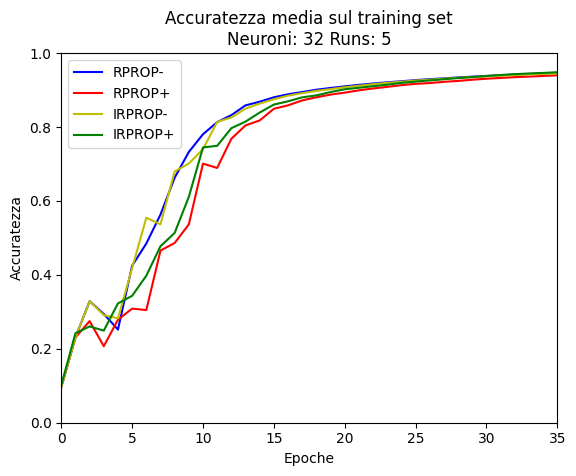

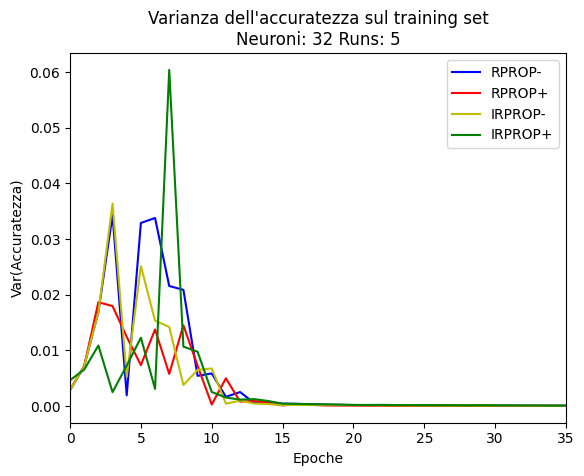

In [22]:
from matplotlib import pyplot as plt

# Stampa grafico dell'accuratezza media del train set
plt.figure()
plt.plot(std_metrics_mean[2], 'b', label='RPROP-')
plt.plot(plus_metrics_mean[2], 'r', label='RPROP+')
plt.plot(istd_metrics_mean[2], 'y', label='IRPROP-')
plt.plot(iplus_metrics_mean[2], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.title(f'Accuratezza media sul training set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_train_acc_mean_{number_of_runs}runs.png')

plt.show()
plt.close()


# Stampa grafico della varianza dell'accuratezza del train set
plt.figure()
plt.plot(std_metrics_variance[2], 'b', label='RPROP-')
plt.plot(plus_metrics_variance[2], 'r', label='RPROP+')
plt.plot(istd_metrics_variance[2], 'y', label='IRPROP-')
plt.plot(iplus_metrics_variance[2], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Var(Accuratezza)')
plt.title(f'Varianza dell\'accuratezza sul training set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_train_acc_var_{number_of_runs}runs.png')

plt.show()

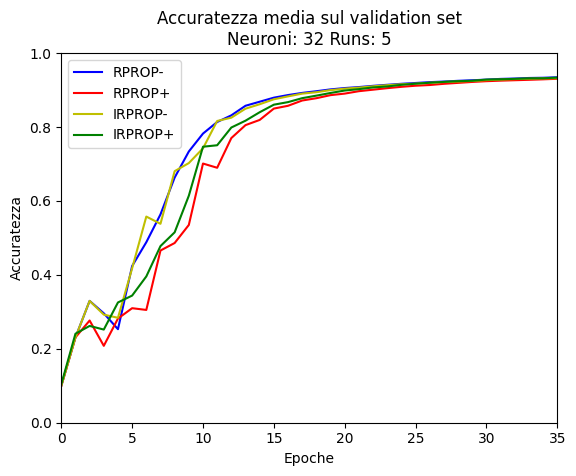

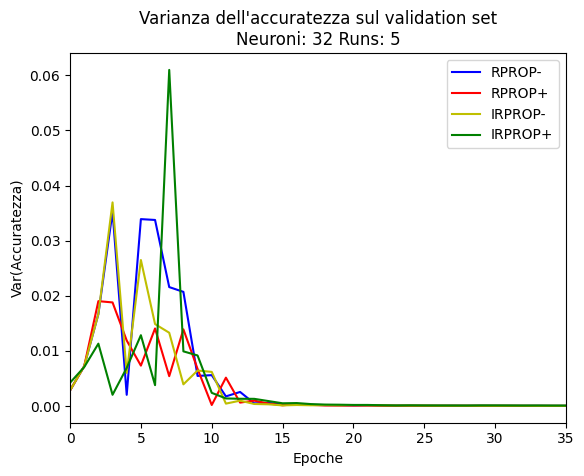

In [23]:
from matplotlib import pyplot as plt

# Stampa grafico dell'accuratezzaa media del validation set
plt.figure()
plt.plot(std_metrics_mean[3],  'b', label='RPROP-')
plt.plot(plus_metrics_mean[3], 'r', label='RPROP+')
plt.plot(istd_metrics_mean[3], 'y', label='IRPROP-')
plt.plot(iplus_metrics_mean[3], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.title(f'Accuratezza media sul validation set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_val_acc_mean_{number_of_runs}runs.png')

plt.show()
plt.close()


# Stampa grafico della varianza dell'accuratezza del validation set
plt.figure()
plt.plot(std_metrics_variance[3],  'b', label='RPROP-')
plt.plot(plus_metrics_variance[3], 'r', label='RPROP+')
plt.plot(istd_metrics_variance[3], 'y', label='IRPROP-')
plt.plot(iplus_metrics_variance[3], 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Var(Accuratezza)')
plt.title(f'Varianza dell\'accuratezza sul validation set\nNeuroni: {', '.join(map(str, hidden_layers))} Runs: {number_of_runs}')
plt.legend()
plt.xlim(0, epochs)

# Salva il plot come file PNG
plt.savefig(f'plots/{','.join(map(str, hidden_layers))}_val_acc_var_{number_of_runs}runs.png')

plt.show()

In [24]:
# Scrive le stringhe nel CSV
with open("data/runs_mean_variance.csv", "a") as file:
     file.write(csv_string_std)
     file.write(csv_string_plus)
     file.write(csv_string_istd)
     file.write(csv_string_iplus)

Test Rprop-
Probabilità predette dalla rete:
Classe 0: 0.0
Classe 1: 0.0
Classe 2: 0.0
Classe 3: 0.0
Classe 4: 0.0
Classe 5: 0.0
Classe 6: 0.0
Classe 7: 0.0
Classe 8: 0.0
Classe 9: 1.0


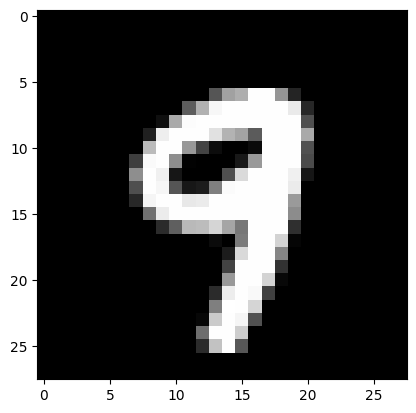

In [25]:
# Predizione rete addestrata con Rprop- (standard)
image = 8000

print('Test Rprop-')
std_training_net.test_prediction(image, test_X)

Test Rprop+
Probabilità predette dalla rete:
Classe 0: 0.0
Classe 1: 0.0
Classe 2: 0.0
Classe 3: 0.0
Classe 4: 0.0
Classe 5: 0.0
Classe 6: 0.0
Classe 7: 0.0
Classe 8: 0.0
Classe 9: 1.0


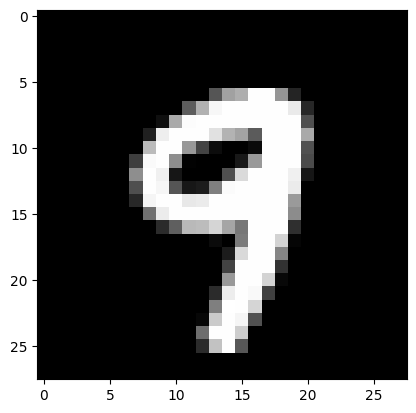

In [26]:
# Predizione rete addestrata con Rprop+ (Rprop con weight-backtracking)
image = 8000

print('Test Rprop+')
plus_training_net.test_prediction(image, test_X)

Test iRprop-
Probabilità predette dalla rete:
Classe 0: 0.0
Classe 1: 0.0
Classe 2: 0.0
Classe 3: 0.0
Classe 4: 0.0
Classe 5: 0.0
Classe 6: 0.0
Classe 7: 0.0
Classe 8: 0.0
Classe 9: 1.0


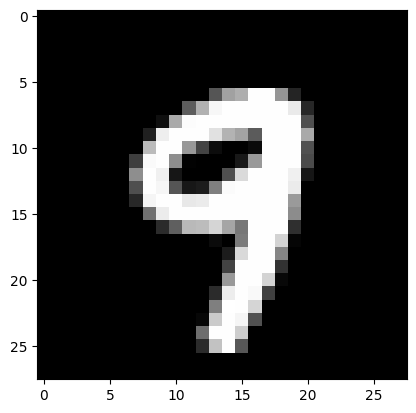

In [27]:
# Predizione rete addestrata con iRprop- (Improved Rprop)
image = 8000

print('Test iRprop-')
istd_training_net.test_prediction(image, test_X)

Test iRprop+
Probabilità predette dalla rete:
Classe 0: 0.0
Classe 1: 0.0
Classe 2: 0.0
Classe 3: 0.0
Classe 4: 0.0
Classe 5: 0.0
Classe 6: 0.0
Classe 7: 0.0
Classe 8: 0.0
Classe 9: 1.0


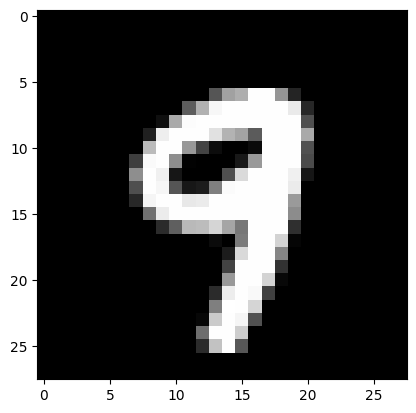

In [28]:
# Predizione rete addestrata con iRprop+ (Improved Rprop con weight-backtracking)
image = 8000

print('Test iRprop+')
iplus_training_net.test_prediction(image, test_X)